## Team 2413:
- Maryam Gholami Shiri (2013071)
- Muhammad Usama Qasim (2040472)
- Laura Schulze (2122311)
- Savina Tsichli (10738280)

# Exercise 4: Restricted Boltzmann Machines (RBMs)
We want to study the performances of an RBM, and, by looking at its learned weights and biases,
better understand the correlations in the data (from file x_RBM_2024_exercise.dat, N=104
configurations with L=10 bits). Use an RBM with M=3 hidden units.

In [3]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 13

Load Data:

In [4]:
dname="DATA"; fname=dname+'/x_RBM_2024_lesson.dat'


# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

#SPINS = True
SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

FileNotFoundError: DATA/x_RBM_2024_lesson.dat not found.

Functions:

In [5]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    #print(x)
    y=list(range(np))
    if np > 1: # to avoid division by 0 for M=1
        for i in range(np):
            y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(7, 3.3))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=300.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.51,0.85,"hidden\nlayer")
    plt.show()

## 4.1 
Increase the number of contrastive divergence steps from n=1 to n=5.

(10000, 10)
Training with 1 CD steps...


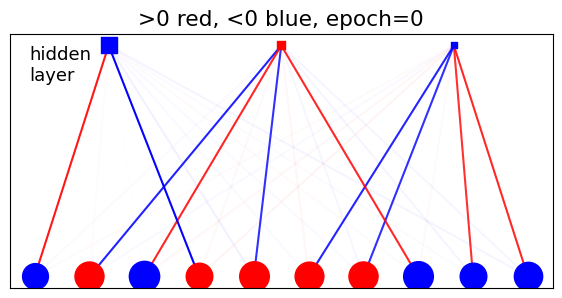

Training with 2 CD steps...


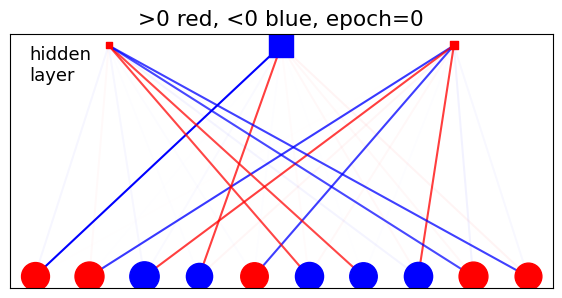

Training with 3 CD steps...


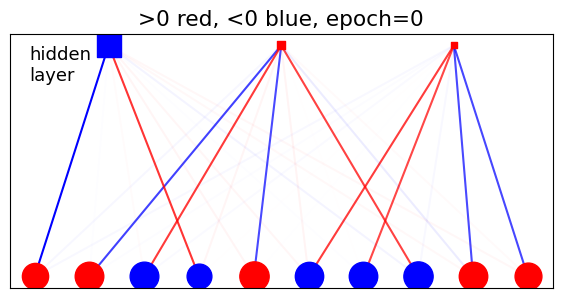

Training with 4 CD steps...


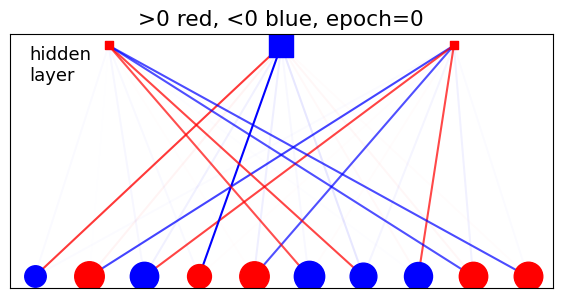

Training with 5 CD steps...


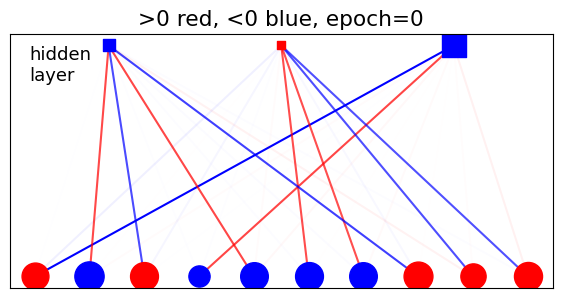

In [8]:
# Load data
data = np.loadtxt('x_RBM_2024_exercise.dat')
print(data.shape)

# Initialize RBM Parameters
L = 10  # Number of visible units
M = 3   # Number of hidden units
W = np.random.randn(L, M)  # Weight matrix
b_visible = np.zeros(L)     # Visible bias
b_hidden = np.zeros(M)      # Hidden bias

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Contrastive Divergence (CD) training with multiple steps
def CD_train(data, W, b_visible, b_hidden, learning_rate=0.1, k=1):
    num_data = len(data)
    for _ in range(k):
        # Positive phase
        positive_hidden = sigmoid(np.dot(data, W) + b_hidden)
        positive_associations = np.dot(data.T, positive_hidden)

        # Negative phase
        negative_visible = np.random.binomial(1, sigmoid(np.dot(positive_hidden, W.T) + b_visible))
        negative_hidden = sigmoid(np.dot(negative_visible, W) + b_hidden)
        negative_associations = np.dot(negative_visible.T, negative_hidden)

        # Update parameters
        W += learning_rate * ((positive_associations - negative_associations) / num_data)
        b_visible += learning_rate * np.mean(data - negative_visible, axis=0)
        b_hidden += learning_rate * np.mean(positive_hidden - negative_hidden, axis=0)

# Training Loop for different numbers of CD steps
epochs = 100          # Number of epochs
batch_size = 32       # Batch size
num_batches = len(data) // batch_size
n_steps_range = range(1, 6)  # Range of CD steps

for n_steps in n_steps_range:
    print(f"Training with {n_steps} CD steps...")
    W = np.random.randn(L, M)  # Reinitialize weights for each set of CD steps

    w = []  # To store weights at each epoch
    for epoch in range(epochs):
        # Shuffle the data for each epoch
        np.random.shuffle(data)
        
        for batch_idx in range(num_batches):
            batch_data = data[batch_idx * batch_size: (batch_idx + 1) * batch_size]
            
            # Update RBM parameters using CD with multiple steps
            CD_train(batch_data, W, b_visible, b_hidden, k=n_steps)
        
        # Save the weights at the end of each epoch
        w.append(W.copy())

    # Plotting the weights of the RBM after training for each set of CD steps
    w = np.array(w)

    def create_coord(np, x0, f=1.0):
        x = [x0] * np
        y = list(range(np))
        for i in range(np):
            y[i] = f * (y[i] / (np - 1.) - 0.5)
        return (x, y)

    (x1, y1) = create_coord(L, 0)
    (x2, y2) = create_coord(M, 1, f=0.7)

    def mycolor(val):
        if val > 0:
            return 'red'
        elif val < 0:
            return 'blue'
        else:
            return 'black'

    def plotgraph(epoch=0):
        fig, ax = plt.subplots(1, 1, figsize=(7, 3.3))
        ax.tick_params(left=False, bottom=False)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())

        A = 1. / max(w.max(), -w.min())
        for i in range(L):
            for j in range(M):
                ex, ey, col = (y1[i], y2[j]), (x1[i], x2[j]), mycolor(w[-1, i, j])
                ax.plot(ex, ey, col, zorder=1, alpha=A * abs(w[-1, i, j]))

        A = 300.
        for i in range(L):
            ax.scatter(y1[i], x1[i], s=A * abs(b_visible[i]), zorder=2, c=mycolor(b_visible[i]))

        for j in range(M):
            ax.scatter(y2[j], x2[j], s=min(300, A * abs(b_hidden[j])), zorder=2, c=mycolor(b_hidden[j]), marker="s")

        ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
        ax.text(-0.51, 0.85, "hidden\nlayer")
        plt.show()

    plotgraph()


## 4.2
Compute the log-likelihood $\mathscr{L}$ during the training, at every epoch, or every minibatch update if it reaches a maximum already in the first epoch. Use “t” as an index of this “time”, indicating the unit in the figures.

(10000, 10)
Epoch 1, Log-Likelihood: 0.20962327024949953
Epoch 2, Log-Likelihood: 0.8490784882078637
Epoch 3, Log-Likelihood: 2.639126976358493
Epoch 4, Log-Likelihood: 2.869510849281651
Epoch 5, Log-Likelihood: 3.255143646663621
Epoch 6, Log-Likelihood: 4.27277746783328
Epoch 7, Log-Likelihood: 3.7118955849272854
Epoch 8, Log-Likelihood: 4.61697285751553
Epoch 9, Log-Likelihood: 4.909735259348632
Epoch 10, Log-Likelihood: 6.6531724197416455
Epoch 11, Log-Likelihood: 7.809886387377334
Epoch 12, Log-Likelihood: 8.060898854193766
Epoch 13, Log-Likelihood: 7.865822531499989
Epoch 14, Log-Likelihood: 8.332052904851569
Epoch 15, Log-Likelihood: 8.643496666446172
Epoch 16, Log-Likelihood: 8.744515477484184
Epoch 17, Log-Likelihood: 9.463854701293016
Epoch 18, Log-Likelihood: 12.183420999955072
Epoch 19, Log-Likelihood: 12.974563777767527
Epoch 20, Log-Likelihood: 13.615784250231656
Epoch 21, Log-Likelihood: 11.329396110855962
Epoch 22, Log-Likelihood: 11.664452196865689
Epoch 23, Log-Likelih

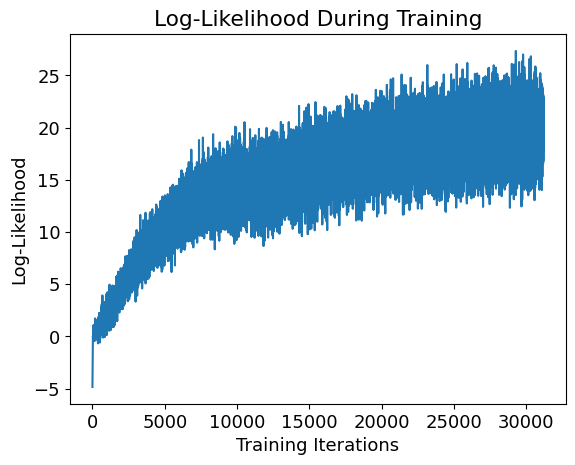

In [2]:
import numpy as np

# Load data
data = np.loadtxt('x_RBM_2024_exercise.dat')
print(data.shape)

# Initialize RBM Parameters
N_visible = 10  # Number of visible units
N_hidden = 3    # Number of hidden units
W = np.random.randn(N_visible, N_hidden)  # Weight matrix
b_visible = np.zeros(N_visible)           # Visible bias
b_hidden = np.zeros(N_hidden)             # Hidden bias

# Define the log-likelihood function
def log_likelihood(data, W, b_visible, b_hidden):
    energy = np.sum(-np.dot(data, b_visible)[:, np.newaxis] - np.log(1 + np.exp(np.dot(data, W) + b_hidden)), axis=1)
    return np.mean(energy)

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Contrastive Divergence (CD) training
def CD_train(data, W, b_visible, b_hidden, learning_rate=0.1, k=1):
    num_data = len(data)
    # Positive phase
    positive_hidden = sigmoid(np.dot(data, W) + b_hidden)
    positive_associations = np.dot(data.T, positive_hidden)

    # Negative phase
    negative_visible = np.random.binomial(1, sigmoid(np.dot(positive_hidden, W.T) + b_visible))
    for i in range(k):
        negative_hidden = sigmoid(np.dot(negative_visible, W) + b_hidden)
        negative_visible = np.random.binomial(1, sigmoid(np.dot(negative_hidden, W.T) + b_visible))
    negative_associations = np.dot(negative_visible.T, negative_hidden)

    # Update parameters
    W += learning_rate * ((positive_associations - negative_associations) / num_data)
    b_visible += learning_rate * np.mean(data - negative_visible, axis=0)
    b_hidden += learning_rate * np.mean(positive_hidden - negative_hidden, axis=0)

# Training Loop
epochs = 100  # Number of epochs
batch_size = 32  # Batch size
num_batches = len(data) // batch_size

log_likelihoods = []

for epoch in range(epochs):
    # Shuffle the data for each epoch
    np.random.shuffle(data)
    
    for batch_idx in range(num_batches):
        batch_data = data[batch_idx * batch_size: (batch_idx + 1) * batch_size]
        
        # Update RBM parameters using CD
        CD_train(batch_data, W, b_visible, b_hidden)
        
        # Compute log-likelihood after each minibatch update
        ll = log_likelihood(batch_data, W, b_visible, b_hidden)
        log_likelihoods.append(ll)
    print(f"Epoch {epoch+1}, Log-Likelihood: {ll}")

# Plot log-likelihood over time
import matplotlib.pyplot as plt

plt.plot(log_likelihoods)
plt.xlabel('Training Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood During Training')
plt.show()

## 4.3
Try RBMs with different numbers of hidden units: M=1, 2, 3 (done above), 4, 5, and 6.

some helper functions:

In [8]:
# let's write functions for plotting & to initialize and train the RBM
def create_plot(w, epoch=0):
    # get correct shape from weights
    L, M = w.shape
    # define coordinate grid
    (x1,y1)=create_coord(L,0)
    (x2,y2)=create_coord(M,1,f=0.7)

    # plot graph
    # just like the plotgraph function
    # but this time with the correct L and M
    fig, ax = plt.subplots(1,1 , figsize=(7, 3.3))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=300.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.51,0.85,"hidden\nlayer")
    plt.show()
    
def init_RBM(L, M=3):
    # range of each initial weight
    sigma = sqrt(4. / float(L + M))
    # random seed for reproducibility
    np.random.seed(12345)
    # initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
    w = sigma * np.random.randn(L,M)
    a = sigma * np.random.randn(L)
    b = np.zeros(M)
    print("w=",w);print("a=",a);print("b=",b)
    return w, a, b

def train_RBM(w, a, b, l_rate = 1.0, showIntermediatePlots=True):
    L, M = w.shape
    print(L, M)
    #create_plot(w, epoch=0)    
    
    # minibatch
    mini, m = 500, 0
    
    # train model
    print('===================================================')
    for epoch in range(100):
        # aggregate normalization of batch statistics and learning rate in l_rate_m
        l_rate_m = l_rate / mini
        for k in range(N):
            if m==0:
                # initialize averages in miniblock
                v_data, v_model = np.zeros(L),np.zeros(L)
                h_data, h_model = np.zeros(M),np.zeros(M)
                vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))
    
            # positive CD phase: generating h 
            h = activate(v[k],w,b,GAP)
            # negative CD phase: generating fantasy vf
            vf = activate(h,w.T,a,GAP)
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf,w,b,GAP)
    
            v_data  += v[k]
            v_model += vf
            h_data  += h
            h_model += hf
            vh_data += np.outer(v[k].T,h)
            vh_model+= np.outer(vf.T,hf)
        
            m += 1
            # minibatch
            if m==mini:
                # gradient of the likelihood: follow it along its positive direction
                # with a "vanilla" SGD
                dw = l_rate_m*(vh_data - vh_model)
                da = l_rate_m*(v_data - v_model)
                db = l_rate_m*(h_data - h_model)
                if epoch<=1 and k<=mini:
                    print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                    print('dw =',dw)
                    print('da =',da)
                    print('db =',db)
                # basic step of vanilla gradient descent, from eq.(211)
                w = w + dw
                a = a + da
                b = b + db
                m=0
        
        # randomize the order of input data
        np.random.shuffle(v)
        # decrease the learning rate (here as a power law)
        l_rate = l_rate / (0.01 * l_rate + 1)
        
        if showIntermediatePlots:
            if epoch%10==9:
                create_plot(w, epoch+1)
                print('l_rate = ',l_rate)
        else: # show only last plot
            if epoch+1==100:
                create_plot(w, epoch+1)
                print('l_rate = ',l_rate)
            

w= [[-0.11355138]
 [ 0.26566996]
 [-0.28813276]
 [-0.30826371]
 [ 1.09041887]
 [ 0.77292249]
 [ 0.05153602]
 [ 0.15628465]
 [ 0.42657697]
 [ 0.69139759]
 [ 0.55868813]
 [-0.7190141 ]]
a= [ 0.15253791  0.12697802  0.75046323  0.49170253 -1.11030861 -0.20626113
  0.92580867 -0.24327472 -0.29939469  0.26458368  1.80218983 -0.56647511]
b= [0.]
12 1
----------- epoch = 0   k= 499   m= 500
dw = [[-0.038]
 [-0.082]
 [-0.17 ]
 [-0.104]
 [ 0.01 ]
 [-0.082]
 [-0.26 ]
 [-0.01 ]
 [-0.002]
 [-0.212]
 [-0.366]
 [ 0.112]]
da = [ 0.002 -0.054 -0.124 -0.048  0.032 -0.05  -0.25   0.034  0.042 -0.216
 -0.398  0.198]
db = [-0.096]
----------- epoch = 1   k= 499   m= 500
dw = [[ 0.08712871]
 [ 0.02574257]
 [ 0.03366337]
 [ 0.03168317]
 [-0.00792079]
 [ 0.02178218]
 [ 0.03762376]
 [ 0.0019802 ]
 [ 0.07128713]
 [ 0.02376238]
 [ 0.01782178]
 [-0.03366337]]
da = [ 0.05346535  0.01386139  0.01782178  0.01386139 -0.07326733 -0.02970297
  0.06138614  0.03168317  0.03366337  0.01584158 -0.00594059 -0.07524752]
db 

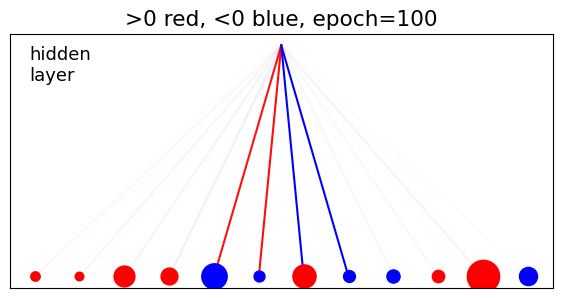

l_rate =  0.5000000000000009
w= [[-0.10942085  0.25600598]
 [-0.27765167 -0.29705034]
 [ 1.05075391  0.74480675]
 [ 0.04966135  0.15059965]
 [ 0.41105985  0.66624739]
 [ 0.53836536 -0.69285933]
 [ 0.14698921  0.12235908]
 [ 0.72316447  0.47381641]
 [-1.06992015 -0.1987582 ]
 [ 0.89213155 -0.23442538]
 [-0.28850394  0.25495921]
 [ 1.73663357 -0.54586907]]
a= [-3.08466139e-01  6.63456126e-02  1.61753753e-01  2.79967947e-01
  5.02599612e-04  7.18296549e-01 -3.81405303e-01 -4.44270254e-01
 -1.26694211e+00 -9.94618479e-01 -4.60094183e-01  2.99410253e-01]
b= [0. 0.]
12 2
----------- epoch = 0   k= 499   m= 500
dw = [[-0.018  0.012]
 [ 0.008  0.064]
 [-0.334 -0.158]
 [-0.128 -0.046]
 [-0.2   -0.084]
 [-0.228 -0.114]
 [ 0.012  0.06 ]
 [-0.16  -0.074]
 [ 0.314  0.246]
 [ 0.028  0.034]
 [ 0.042  0.036]
 [-0.3   -0.192]]
da = [ 0.06   0.086 -0.296 -0.082 -0.152 -0.174  0.068 -0.118  0.43   0.094
  0.098 -0.29 ]
db = [-0.12  -0.002]
----------- epoch = 1   k= 499   m= 500
dw = [[-0.01782178 -0.059

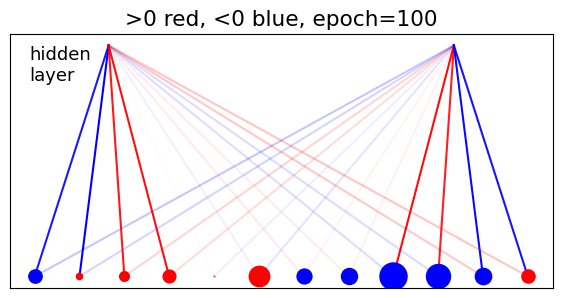

l_rate =  0.5000000000000009
w= [[-1.05710581e-01  2.47325276e-01 -2.68236999e-01]
 [-2.86977895e-01  1.01512472e+00  7.19551678e-01]
 [ 4.79774212e-02  1.45493088e-01  3.97121546e-01]
 [ 6.43656130e-01  5.20110348e-01 -6.69365702e-01]
 [ 1.42005069e-01  1.18210102e-01  6.98643250e-01]
 [ 4.57750143e-01 -1.03364106e+00 -1.92018661e-01]
 [ 8.61880964e-01 -2.26476438e-01 -2.78721284e-01]
 [ 2.46314000e-01  1.67774743e+00 -5.27359626e-01]
 [-2.98006602e-01  6.40959511e-02  1.56268971e-01]
 [ 2.70474733e-01  4.85557355e-04  6.93940393e-01]
 [-3.68472529e-01 -4.29205842e-01 -1.22398236e+00]
 [-9.60892739e-01 -4.44493209e-01  2.89257786e-01]]
a= [-0.65372576  0.06187846 -0.54919547  0.1718999  -1.21839863 -0.10304354
 -0.79628307 -0.50128587 -0.67494752  0.14787037  0.19519016 -0.38930533]
b= [0. 0. 0.]
12 3
----------- epoch = 0   k= 499   m= 500
dw = [[ 0.06   0.078  0.082]
 [-0.138 -0.154 -0.134]
 [ 0.042 -0.034 -0.022]
 [-0.05  -0.15  -0.072]
 [ 0.044  0.022  0.04 ]
 [ 0.054  0.032  0.06

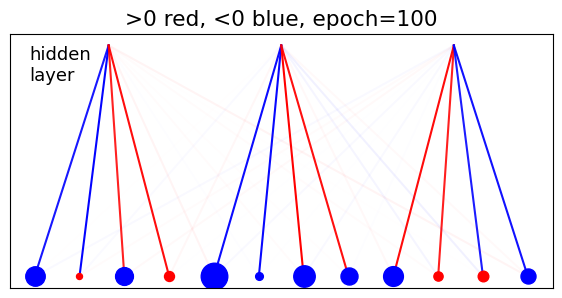

l_rate =  0.5000000000000009
w= [[-1.02353830e-01  2.39471669e-01 -2.59719358e-01 -2.77865152e-01]
 [ 9.82890286e-01  6.96702916e-01  4.64539384e-02  1.40873076e-01]
 [ 3.84511284e-01  6.23217368e-01  5.03594679e-01 -6.48110555e-01]
 [ 1.37495817e-01  1.14456439e-01  6.76458418e-01  4.43214670e-01]
 [-1.00081865e+00 -1.85921269e-01  8.34512655e-01 -2.19284868e-01]
 [-2.69870723e-01  2.38492505e-01  1.62447196e+00 -5.10613762e-01]
 [-2.88543652e-01  6.20606378e-02  1.51306781e-01  2.61886034e-01]
 [ 4.70138888e-04  6.71904897e-01 -3.56771993e-01 -4.15576769e-01]
 [-1.18511583e+00 -9.30380394e-01 -4.30378699e-01  2.80072647e-01]
 [-6.32967246e-01  5.99135623e-02 -5.31756224e-01  1.66441358e-01]
 [-1.17970940e+00 -9.97714777e-02 -7.70997764e-01 -4.85367956e-01]
 [-6.53515125e-01  1.43174874e-01  1.88992055e-01 -3.76943267e-01]]
a= [ 0.16564283  0.67487111  0.03493834  0.12333705 -0.0059308   0.5024058
  0.66359731 -0.45963078 -0.77455322  0.0110923   0.37918157 -0.33026216]
b= [0. 0. 0. 0

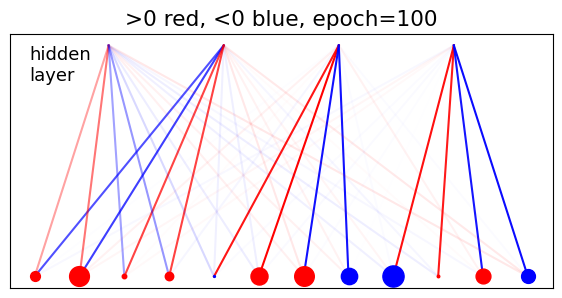

l_rate =  0.5000000000000009
w= [[-9.92978003e-02  2.32321644e-01 -2.51964787e-01 -2.69568793e-01
   9.53543640e-01]
 [ 6.75901109e-01  4.50669399e-02  1.36666959e-01  3.73030738e-01
   6.04609656e-01]
 [ 4.88558601e-01 -6.28759594e-01  1.33390535e-01  1.11039056e-01
   6.56261060e-01]
 [ 4.29981388e-01 -9.70936712e-01 -1.80370124e-01  8.09596193e-01
  -2.12737570e-01]
 [-2.61813058e-01  2.31371715e-01  1.57596929e+00 -4.95368112e-01
  -2.79928459e-01]
 [ 6.02076624e-02  1.46789139e-01  2.54066772e-01  4.56101716e-04
   6.51843496e-01]
 [-3.46119673e-01 -4.03168686e-01 -1.14973123e+00 -9.02601562e-01
  -4.17528667e-01]
 [ 2.71710378e-01 -6.14068426e-01  5.81246932e-02 -5.15879313e-01
   1.61471835e-01]
 [-1.14448623e+00 -9.67925508e-02 -7.47977698e-01 -4.70876082e-01
  -6.34002798e-01]
 [ 1.38900030e-01  1.83349225e-01 -3.65688684e-01  1.60697144e-01
   6.54721143e-01]
 [ 3.38951728e-02  1.19654519e-01 -5.75372166e-03  4.87405214e-01
   6.43783950e-01]
 [-4.45907353e-01 -7.51426997e-01

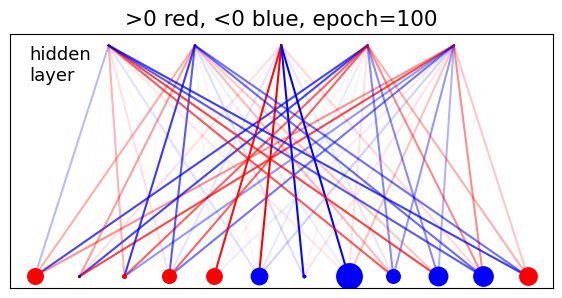

l_rate =  0.5000000000000009
w= [[-9.65001161e-02  2.25776055e-01 -2.44865759e-01 -2.61973778e-01
   9.26677849e-01  6.56857809e-01]
 [ 4.37971931e-02  1.32816410e-01  3.62520715e-01  5.87574970e-01
   4.74793616e-01 -6.11044491e-01]
 [ 1.29632299e-01  1.07910566e-01  6.37771112e-01  4.17866799e-01
  -9.43580877e-01 -1.75288253e-01]
 [ 7.86786076e-01 -2.06743756e-01 -2.54436557e-01  2.24852890e-01
   1.53156685e+00 -4.81411272e-01]
 [-2.72041564e-01  5.85113305e-02  1.42653401e-01  2.46908521e-01
   4.43251194e-04  6.33478012e-01]
 [-3.36367860e-01 -3.91809536e-01 -1.11733792e+00 -8.77171048e-01
  -4.05764929e-01  2.64055023e-01]
 [-5.96767242e-01  5.64870483e-02 -5.01344576e-01  1.56922417e-01
  -1.11224069e+00 -9.40654512e-02]
 [-7.26903663e-01 -4.57609298e-01 -6.16139969e-01  1.34986565e-01
   1.78183419e-01 -3.55385521e-01]
 [ 1.56169553e-01  6.36274582e-01  3.29401870e-02  1.16283291e-01
  -5.59161237e-03  4.73672726e-01]
 [ 6.25645541e-01 -4.33344054e-01 -7.30255778e-01  1.045792

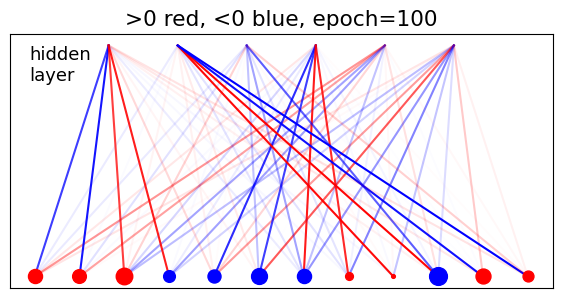

l_rate =  0.5000000000000009


In [9]:
mvals = np.arange(1,7)
# M=1 needs a different coordinate creation
# bc we get a division by 0 otherwise
for m in mvals:    
    # initialise RBM
    w, a, b = init_RBM(L, M=m)
    # train RBM, show only last plot (at epoch==100)
    train_RBM(w, a, b, showIntermediatePlots=False)  

## 4.4
for M=3, plot $\mathscr{L}$ as a function of “t”, comparing the two contrastive divergence cases (n=1 and n=5). Then, for n=1, plot $\mathscr{L}$ as a function of “t”, comparing the two cases with different M.

## 4.5
From the weights learned by the RBM, guess the structure of the data.

To compute $\mathscr{L}$ , consider full configurations x=(v,h) and their energy E(x). With $\mathscr{L}$ visible units and M hidden units, we have 2L+M possible configurations. The partition function Z is the sum of all their Boltzmann weights e-E(x). The average expectation of the energy according to data is computed by averaging the energy of each data sample vn completed with all 2M possible hidden states. Thus, in total there are N*2M configurations to use in the <E>data average.

The package `itertools` is useful for generating the possible configurations.
https://docs.python.org/3/library/itertools.html
```python
Q=4
import itertools as it
conf = it.product((0,1), repeat=Q)
all_conf=list(conf)
for x in all_conf:
print(x)
```